In [3]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train = train.drop_duplicates()
test = test.drop_duplicates()

In [4]:
#Exploring the data
print("Data Types of features of Training Data is:")
print(train.dtypes)
print("\n"+"-"*100)
print("\nData types of features of Testing Data is:")
print(test.dtypes)

Data Types of features of Training Data is:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

----------------------------------------------------------------------------------------------------

Data types of features of Testing Data is:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


In [5]:
#Checking for NULL values
missing_values_train = train.isnull().sum()
print(missing_values_train)
print('\n'+'-'*100)
missing_values_test = test.isnull().sum()
print(missing_values_test)


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

----------------------------------------------------------------------------------------------------
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [6]:
train = train.dropna()

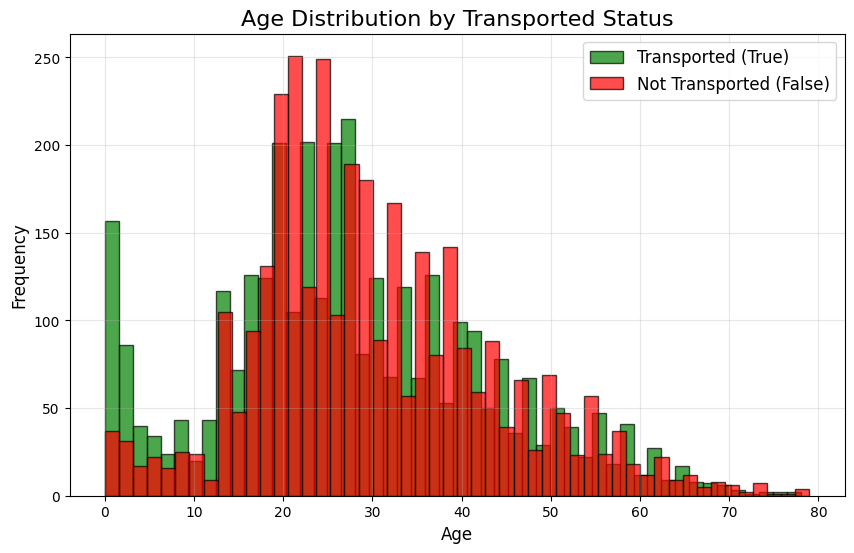

In [7]:
import matplotlib.pyplot as plt

# Define transported and non-transported groups
transported = train[train['Transported'] == True]['Age']
not_transported = train[train['Transported'] == False]['Age']

# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(transported, bins=50, alpha=0.7, label='Transported (True)', color='green', edgecolor='black')
plt.hist(not_transported, bins=50, alpha=0.7, label='Not Transported (False)', color='red', edgecolor='black')

# Add labels and legend
plt.title('Age Distribution by Transported Status', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


<Axes: >

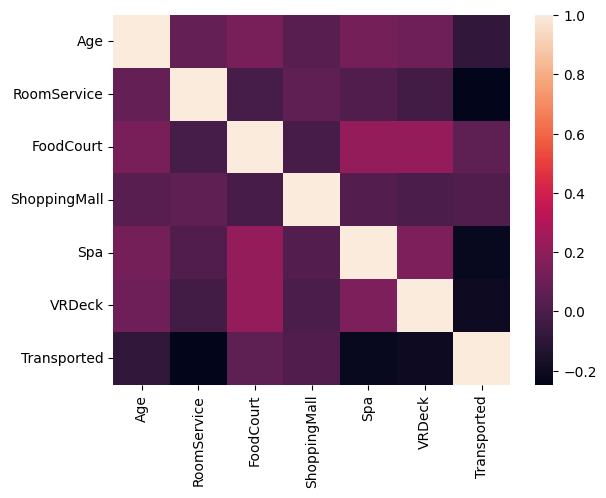

In [8]:
import seaborn as sns
sns.heatmap(train.corr(numeric_only=True))

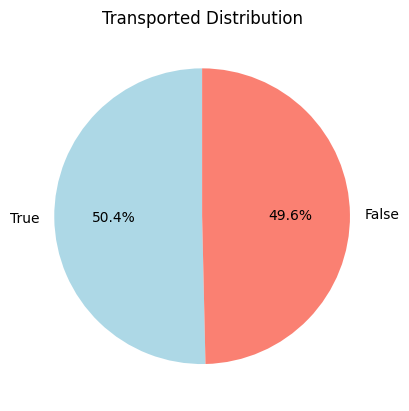

In [9]:
#Pie Chart to know the percentage of people transported
counts = train["Transported"].value_counts(normalize=True)

# Count the values in the Transported column
counts = train["Transported"].value_counts()

# Creating a pie chart
plt.pie(
    counts, 
    labels=counts.index,  # Labeling True and False
    autopct="%1.1f%%",    # To show percentages on the chart
    colors=["lightblue", "salmon"],  #Setting colors
    startangle=90         # Rotate the pie for better readability
)

# Adding a title
plt.title("Transported Distribution")

# Show the plot
plt.show()


In [10]:
#Changing destination planets to values
train = train.replace({'Earth':1,'Mars':2,'Europa':3})
train

C:\Users\schak\AppData\Local\Temp\ipykernel_20408\652076984.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train = train.replace({'Earth':1,'Mars':2,'Europa':3})


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,3,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,1,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,3,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,3,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,1,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,3,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,1,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,1,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,3,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [11]:
X = train.drop(columns=['Transported','Name'])  # Features
y = train['Transported']  # Target


from sklearn.preprocessing import LabelEncoder #using this to convert

le = LabelEncoder()
X['CryoSleep'] = le.fit_transform(X['CryoSleep'])
X['Cabin'] = le.fit_transform(X['Cabin'])
X['Destination'] = le.fit_transform(X['Destination'])
X['VIP'] = le.fit_transform(X['VIP'])


y = y.replace({False: 0, True: 1})  #Mapping target to numerical value

print(X)

     PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
0        0001_01           3          0    137            2  39.0    0   
1        0002_01           1          0   1823            2  24.0    0   
2        0003_01           3          0      1            2  58.0    1   
3        0003_02           3          0      1            2  33.0    0   
4        0004_01           1          0   1825            2  16.0    0   
...          ...         ...        ...    ...          ...   ...  ...   
8688     9276_01           3          0    134            0  41.0    1   
8689     9278_01           1          1   4293            1  18.0    0   
8690     9279_01           1          0   4298            2  26.0    0   
8691     9280_01           3          0   1778            0  32.0    0   
8692     9280_02           3          0   1778            2  44.0    0   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  
0             0.0        0.0           0.0     0.0

C:\Users\schak\AppData\Local\Temp\ipykernel_20408\2290162788.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({False: 0, True: 1})  #Mapping target to numerical value


In [12]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your features and 'y' is your target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression #Using this model for binary classification
from sklearn.metrics import accuracy_score #Using this to evaluate the model performence

# Initializing
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.78


c:\Users\schak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
#Changing the hyperparameters
from sklearn.model_selection import GridSearchCV

#Define the Parameter Grid: Create a dictionary of hyperparameters to test.
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Test different regularization strengths
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Try multiple solvers
    'penalty': ['l2'],  # Use 'l1' or 'l2' for different regularization
    'max_iter': [100, 200, 500],  # Adjust maximum iterations
}

model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)



c:\Users\schak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\schak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.7816037025888019


In [15]:
#Train the model with these best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


Test Accuracy: 0.794251134644478
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       653
           1       0.83      0.75      0.79       669

    accuracy                           0.79      1322
   macro avg       0.80      0.79      0.79      1322
weighted avg       0.80      0.79      0.79      1322

Confusion Matrix:
 [[551 102]
 [170 499]]


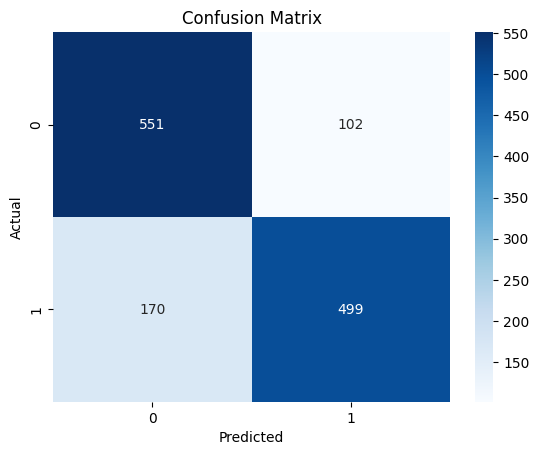

In [35]:
# Import necessary libraries
from sklearn.model_selection import train_test_split # Used to split the data
from sklearn.neighbors import KNeighborsClassifier #Contains model code
from sklearn.preprocessing import StandardScaler #To scale the value 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assume X and y are your features and target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the KNN Model
k = 60  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Step 3: Make Predictions on Test Data
y_pred = knn.predict(X_test_scaled)

# Step 4: Evaluate the Model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Step 5: Visualize the Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
